# About Data

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data was collected from the 1994 U.S. Census. The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **fnlwgt**: continuous.
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

###### Gathering data

In [313]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score

In [314]:
df=pd.read_csv('adult.data',sep=',',names=['age',
 'workclass',
 'fnlwgt',
 'education_level',
 'education_num',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income'])

In [315]:
df.sample(5)

,age,workclass,fnlwgt,education_level,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
6939,21,Private,116788,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
23761,47,Private,34458,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<=50K
22461,21,Private,265434,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
28915,29,Local-gov,82393,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Asian-Pac-Islander,Male,0,1590,45,United-States,<=50K
16898,27,Private,114967,Bachelors,13,Never-married,Sales,Own-child,White,Male,0,0,40,United-States,<=50K


###### Assessing data

In [316]:
# strip all object elements before clean
df[list(df.select_dtypes(['object']))]=df.select_dtypes(['object']).applymap(lambda x: x.strip())

In [317]:
# Nan 
df.isna().sum().sum()

0

In [318]:
# missing values
df[df.values=='?']

,age,workclass,fnlwgt,education_level,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K
32542,72,?,129912,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,25,United-States,<=50K


In [319]:
# replace nan back
df.replace('?',np.nan,inplace=True)

In [320]:
# nans
df.isna().sum()

age                   0
workclass          1836
fnlwgt                0
education_level       0
education_num         0
marital_status        0
occupation         1843
relationship          0
race                  0
sex                   0
capital_gain          0
capital_loss          0
hours_per_week        0
native_country      583
income                0
dtype: int64

In [321]:
df.isna().sum().sum()

4262

> there are total 4262 nans

In [322]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        30725 non-null  object
 2   fnlwgt           32561 non-null  int64 
 3   education_level  32561 non-null  object
 4   education_num    32561 non-null  int64 
 5   marital_status   32561 non-null  object
 6   occupation       30718 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   sex              32561 non-null  object
 10  capital_gain     32561 non-null  int64 
 11  capital_loss     32561 non-null  int64 
 12  hours_per_week   32561 non-null  int64 
 13  native_country   31978 non-null  object
 14  income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


> all the data types are correct

In [323]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [324]:
# duplivcates
df[df.duplicated()].shape

(24, 15)

In [325]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [326]:
df.shape

(32537, 15)

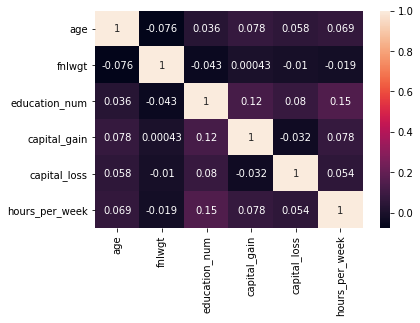

In [327]:
# correlation heatmap
sns.heatmap(df.corr(),annot=True);

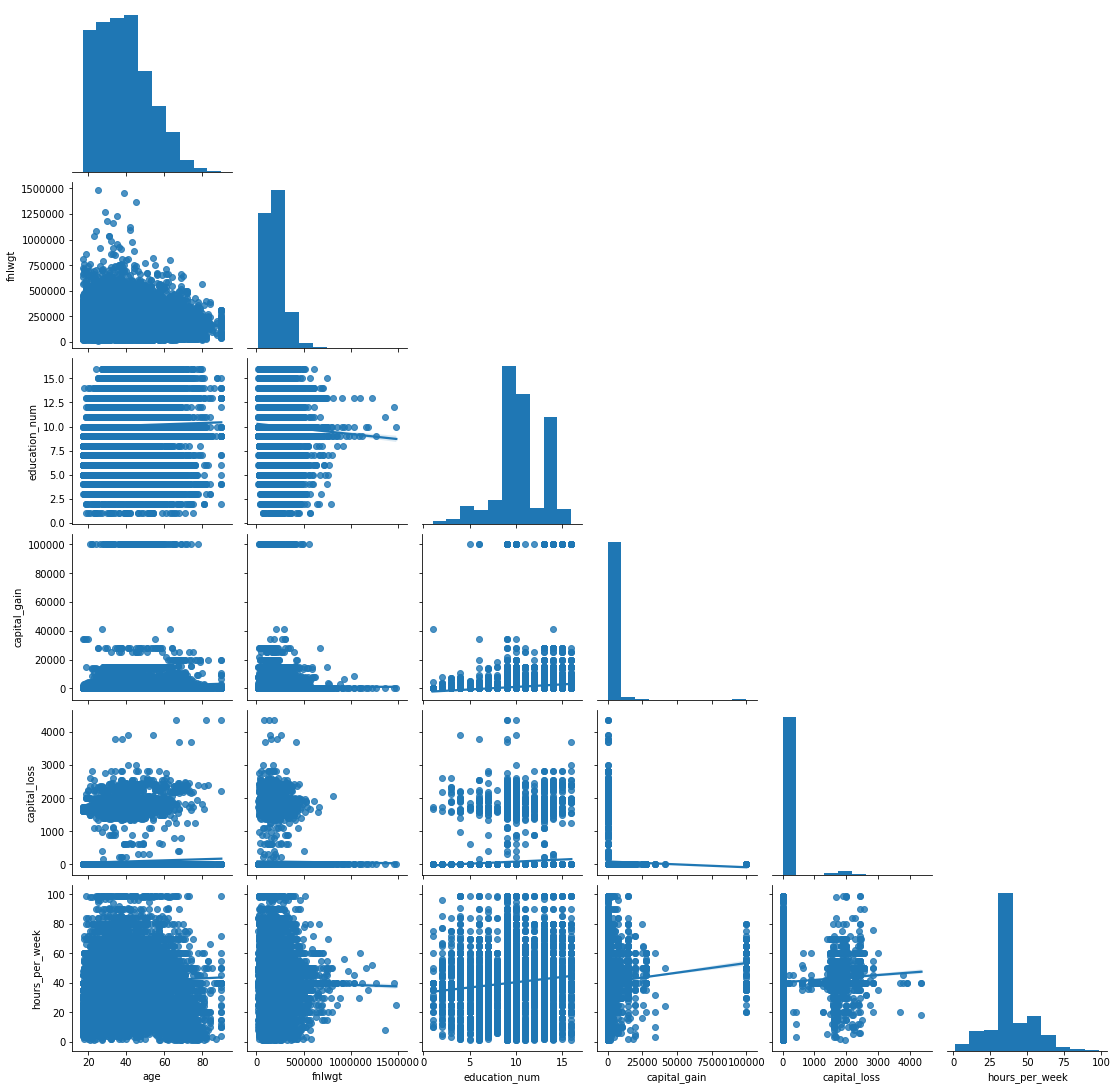

In [328]:
sns.pairplot(df, corner=True,kind='reg');

###### Data Wrangling

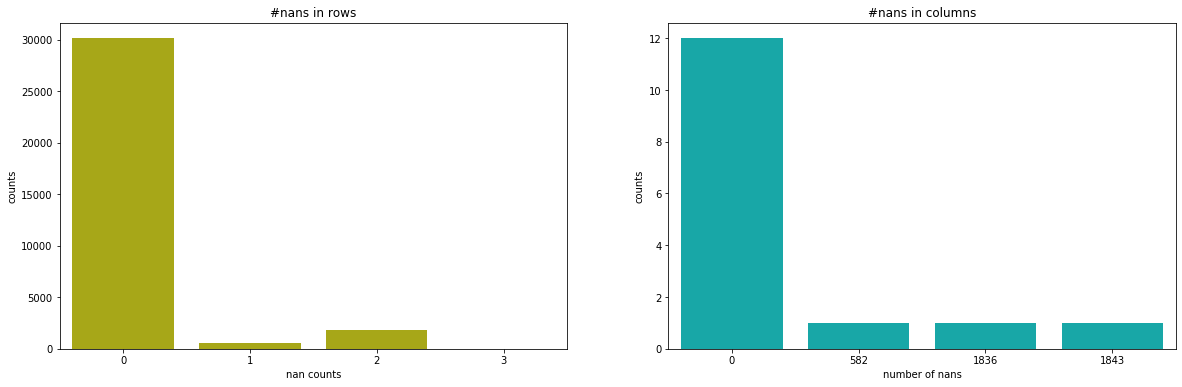

In [329]:
# assessing missing data in each row
plt.figure(figsize=(20,6))

plt.subplot(121)
rowmiss=df.isna().sum(axis=1)
sns.countplot(rowmiss.values,color='y')
plt.title('#nans in rows')
plt.xlabel('nan counts')
plt.ylabel('counts')

# assessing missing data in each column
plt.subplot(122)
colmiss=df.isna().sum()
sns.countplot(colmiss.values, color='c')
plt.title('#nans in columns')
plt.xlabel('number of nans')
plt.ylabel('counts');

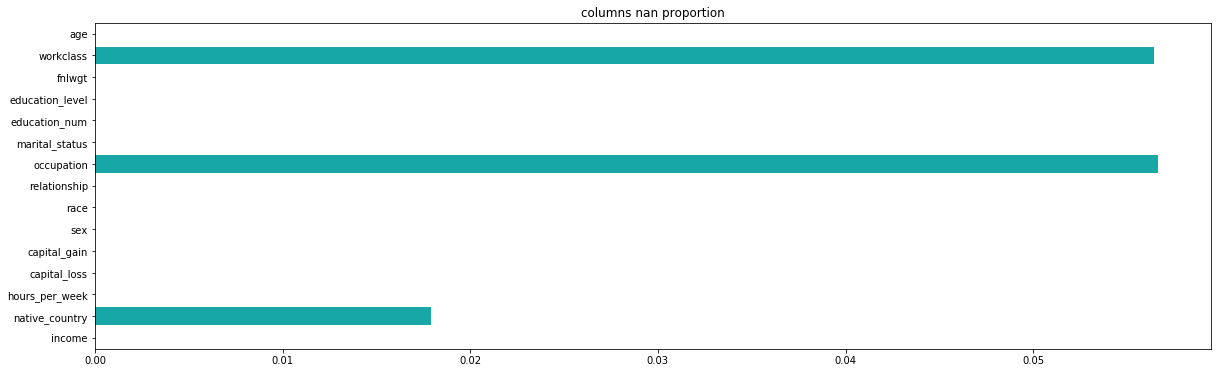

In [330]:
plt.figure(figsize=(20,6))
misspro=df.isna().mean()
sns.barplot(y=misspro.index,x=misspro.values,color='c')
plt.title('columns nan proportion');

In [331]:
print('proportion of rows contain Nan in the dataset :{0:.2f}'.format(100*df.isna().any(axis=1).mean()))

proportion of rows contain Nan in the dataset :7.37


> I decided to ignore the Nans for now as they are smaller than 6% in ech columns, and only 7% of the entire dataset. All of them are categorical values. As we are proceeding exploratory and explanatory analysis, this won't have a big impact of our insight. We will come back and handle the missing values later when we proceed ML training and predicting.

In [332]:
# drop fnlwgt
df.drop(['fnlwgt'],axis=1,inplace=True)

In [333]:
# one hot encoding income
df=pd.get_dummies(data=df, columns=['income'],drop_first=True)

> As the distplot showing below, for highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

In [387]:
# plot func
def twodistplot(dataframe):
    sublist=[121,122]
    collist=['capital_gain','capital_loss']
    plt.figure(figsize=(20,6))
    for position, column in zip(sublist,collist):
        plt.subplot(position)
        sns.distplot(dataframe[column],kde=False)
        plt.ylim(0,2000)
        plt.title('{} distrubution'.format(column))
        plt.ylabel('counts')
    if (dataframe['capital_gain']==df['capital_gain']).all():
        plt.suptitle(t='Skewed Distributions',fontsize=15)
    elif (dataframe['capital_gain']==df_logtrans['capital_gain']).all():
        plt.suptitle(t='Log_transformed Distributions',fontsize=15)

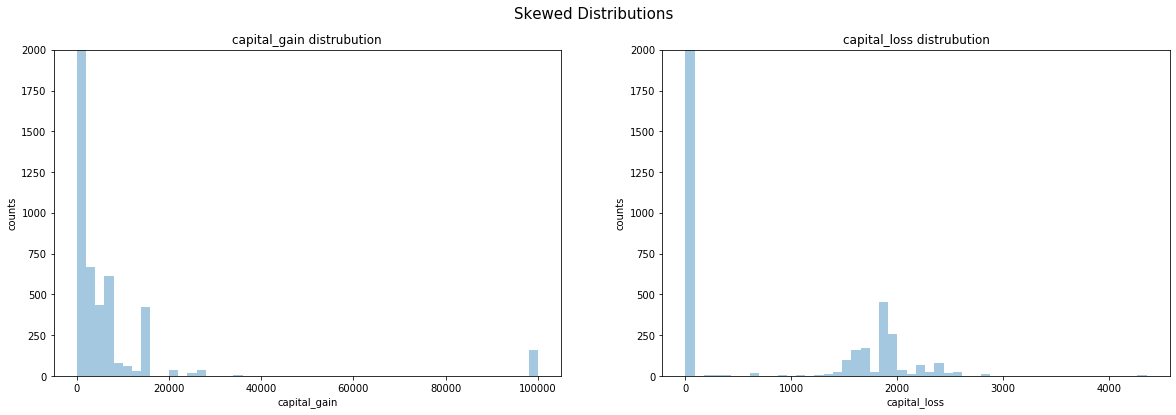

In [386]:
# Skewed Distributions plot
twodistplot(df)

In [384]:
(df_logtrans['capital_gain']==df['capital_gain']).all()

False

In [ ]:
def twodistplot (col1,col2,suptitle,df):
    
    sublist=[121,122]
    collist=[col1,col2]
    plt.figure(figsize=(20,6))
    plt.suptitle(t=suptitle,fontsize=15)
    for position, column in zip(sublist,collist):
        plt.subplot(position)
        sns.distplot(df[column],kde=False)
        plt.ylim(0,2000)
        plt.title('{} distrubution'.format(column))
        plt.ylabel('counts')

In [351]:
# log transformation
df_logtrans=df.copy()
df_logtrans[['capital_gain','capital_loss']]=df[['capital_gain','capital_loss']].apply(lambda x : np.log(x+1))

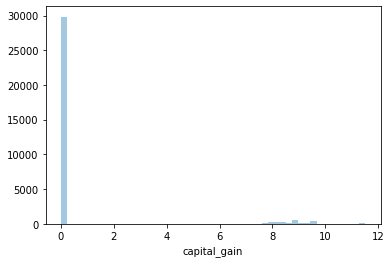

In [312]:
sns.distplot(df['capital_gain'],kde=False)